In [26]:
import json
import matplotlib.pyplot as plt

last_req = {}
all_req = {}

with open('./data/data_training/dataSet_3/requests', 'r') as file:
    for line in file.readlines():
        data = json.loads(line)
        key = data['metaKey']
        # first key
        if key not in last_req.keys():
            last_req[key] = data['startTime'] + data['durationsInMs']
            continue

        l_req = last_req[key]
        last_req[key] = max(l_req, data['startTime'] + data['durationsInMs'])
        if l_req > data['startTime']:
            continue

        if key not in all_req.keys():
            all_req[key] = []
        all_req[key].append(data['startTime'] - l_req)

fig_num = len(all_req.keys())
cur = 1
plt.figure(figsize=(6, 400))
for key, value in all_req.items():
    plt.subplot(fig_num, 1, cur)
    plt.plot(value)
    plt.title(key)
    cur += 1
plt.subplots_adjust(hspace=0.4)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/data_training/dataSet_4/requests'

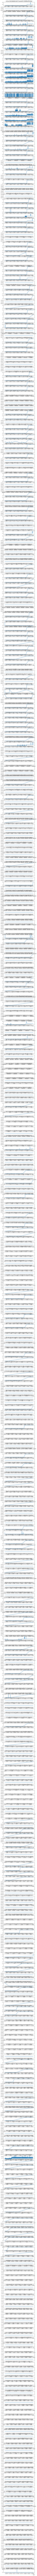

In [23]:
import json
import matplotlib.pyplot as plt

timeline = {}

base_start_time = -1
with open('./data/data_training/function_smoke_test/requests', 'r') as file:
    for line in file.readlines():
        data = json.loads(line)
        key = data['metaKey']
        start_time = data['startTime']
        if base_start_time == -1:
            base_start_time = start_time
        if key not in timeline.keys():
            timeline[key] = {}
        if (start_time - base_start_time) not in timeline[key].keys():
            timeline[key][start_time - base_start_time] = 1
        else:
            timeline[key][start_time - base_start_time] += 1

fig_num = len(timeline.keys())
cur = 1
plt.figure(figsize=(6, 500))
for key, value in timeline.items():
    x = list(value.keys())
    y = list(value.values())
    plt.subplot(fig_num, 1, cur)
    plt.plot(x, y)
    plt.title(key)
    cur += 1
plt.subplots_adjust(hspace=0.4)
plt.show()